# Correlation between BSS trips and COVID-19

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Import and prepare covid data

In [2]:
data_folder = '../data/'
covid_data = pd.read_csv(data_folder + 'covid/treated_data/covid_grouped_by_month.csv')
covid_data.head()

,date,new_cases_ma,new_deaths_ma
0,2020-03-01,150.576923,12.333333
1,2020-04-01,2174.333333,154.366667
2,2020-05-01,12159.870968,709.129032
3,2020-06-01,27629.260870,1006.033333
4,2020-07-01,38946.774194,1044.064516


In [3]:
from modules.DataPreparation import DataPreparation
dp = DataPreparation()

In [4]:
covid_data = dp.transform_to_datetime(covid_data, ['date'])
covid_data = dp.transform_to_time_series(covid_data, 'date', drop=True)
covid_data.head()

,new_cases_ma,new_deaths_ma
date,,
2020-03-01,150.576923,12.333333
2020-04-01,2174.333333,154.366667
2020-05-01,12159.870968,709.129032
2020-06-01,27629.260870,1006.033333
2020-07-01,38946.774194,1044.064516


## Prepare trips data

In [5]:
without_outliers = False

In [6]:
data_folder = '../data/'

if without_outliers:
    source_folder_path =  data_folder + 'trips/new_analysis/'
else:
    source_folder_path = data_folder + 'trips/new_analysis/'

destination_folder_path = data_folder + 'charts/covid/new/'

In [7]:
trips = pd.read_csv(source_folder_path + 'trips_grouped_by_month_mean.csv')
trips.head()

,date,number_of_trips,Unnamed: 0,Index,tripduration,start station id,end station id,hour,week_day,weekend,holiday,age,distance
0,2018-01-01,342,170.5,170.5,3156.096491,18.985294,15.932353,15.757310,1.967836,0.058480,0.000000,NaN,1831.102767
1,2018-02-01,13344,7013.5,7013.5,1878.453687,18.569040,17.529425,13.633094,2.703312,0.172662,0.032224,NaN,2103.877819
2,2018-03-01,24889,26130.0,26130.0,1961.525493,16.963756,16.993008,13.020933,2.663104,0.157660,0.014183,NaN,2286.215518
3,2018-04-01,32386,54767.5,54767.5,1612.509232,20.674716,20.473042,13.341382,2.464120,0.136355,0.027790,NaN,2406.285212
4,2018-05-01,68695,105308.0,105308.0,1825.916137,53.345687,53.443712,13.521828,2.491608,0.141713,0.072218,NaN,2558.379083


In [8]:
from modules.DataPreparation import DataPreparation
dp = DataPreparation()

In [9]:
trips = dp.transform_to_datetime(trips, ['date'])

In [10]:
trips = dp.transform_to_time_series(trips, 'date', drop = True)

In [11]:
trips

,number_of_trips,Unnamed: 0,Index,tripduration,start station id,end station id,hour,week_day,weekend,holiday,age,distance
date,,,,,,,,,,,,
2018-01-01,342,170.5,170.5,3156.096491,18.985294,15.932353,15.757310,1.967836,0.058480,0.000000,NaN,1831.102767
2018-02-01,13344,7013.5,7013.5,1878.453687,18.569040,17.529425,13.633094,2.703312,0.172662,0.032224,NaN,2103.877819
2018-03-01,24889,26130.0,26130.0,1961.525493,16.963756,16.993008,13.020933,2.663104,0.157660,0.014183,NaN,2286.215518
2018-04-01,32386,54767.5,54767.5,1612.509232,20.674716,20.473042,13.341382,2.464120,0.136355,0.027790,NaN,2406.285212
2018-05-01,68695,105308.0,105308.0,1825.916137,53.345687,53.443712,13.521828,2.491608,0.141713,0.072218,NaN,2558.379083
2018-06-01,92508,185909.5,185909.5,1907.713214,59.543914,58.059387,13.664440,2.519501,0.136042,0.000000,NaN,2661.473900
2018-07-01,112047,288187.0,288187.0,2040.091970,65.787734,63.875300,13.602167,2.556052,0.176979,0.024383,NaN,2626.535134
2018-08-01,137359,412890.0,412890.0,2376.982244,64.914536,63.809777,13.650303,2.525215,0.121506,0.000000,NaN,2714.261954
2018-09-01,161500,562319.5,562319.5,1878.709009,66.580790,64.723008,13.669412,2.724378,0.218693,0.023777,NaN,2617.721824


## Merge COVID and trip data

In [12]:
trips_and_covid = pd.merge(trips, covid_data, left_index=True, right_index=True)
trips_and_covid

,number_of_trips,Unnamed: 0,Index,tripduration,start station id,end station id,hour,week_day,weekend,holiday,age,distance,new_cases_ma,new_deaths_ma
date,,,,,,,,,,,,,,
2020-03-01,254555,4571251.0,4571251.0,1598.689380,122.362975,124.475561,14.308589,2.714136,0.205798,0.000000,29.489589,2066.767922,150.576923,12.333333
2020-04-01,171013,4784035.0,4784035.0,1864.477385,134.627145,135.159644,15.060416,3.128277,0.291411,0.097677,28.081663,1500.378802,2174.333333,154.366667
2020-05-01,165918,4952500.5,4952500.5,1830.197519,137.094752,137.387558,15.022198,3.429128,0.363420,0.039146,28.588174,1582.606811,12159.870968,709.129032
2020-06-01,149364,5110141.5,5110141.5,1853.604409,135.094294,135.520547,15.012265,3.038322,0.287137,0.038229,28.856015,1598.006229,27629.260870,1006.033333
2020-07-01,172190,5270918.5,5270918.5,1816.509733,137.935571,138.383704,14.859899,3.177304,0.286515,0.031006,29.372170,1768.756514,38946.774194,1044.064516
2020-08-01,185598,5449812.5,5449812.5,1842.360047,136.988739,137.339907,14.784766,3.208461,0.338700,0.000000,29.462347,1764.155736,41451.129032,973.645161
2020-09-01,211317,5648270.0,5648270.0,1887.476119,141.006308,140.549930,14.619415,3.014093,0.289451,0.040224,29.349539,1743.258083,31207.833333,748.766667
2020-10-01,207622,5857739.5,5857739.5,2006.921164,138.524512,137.901674,14.660344,3.078407,0.284931,0.041123,29.283949,1766.925183,23612.064516,537.258065
2020-11-01,160526,6041813.5,6041813.5,2363.787038,140.336496,139.276399,14.355419,3.150898,0.329218,0.078467,30.216679,2028.508597,25812.133333,445.700000


In [13]:
trips_and_covid['age'].first_valid_index()

Timestamp('2020-03-01 00:00:00')

In [14]:
trips_and_covid = trips_and_covid.rename({'distance_in_meters_bicycle':'distance'}, axis = 1)

In [15]:
trips_and_covid

,number_of_trips,Unnamed: 0,Index,tripduration,start station id,end station id,hour,week_day,weekend,holiday,age,distance,new_cases_ma,new_deaths_ma
date,,,,,,,,,,,,,,
2020-03-01,254555,4571251.0,4571251.0,1598.689380,122.362975,124.475561,14.308589,2.714136,0.205798,0.000000,29.489589,2066.767922,150.576923,12.333333
2020-04-01,171013,4784035.0,4784035.0,1864.477385,134.627145,135.159644,15.060416,3.128277,0.291411,0.097677,28.081663,1500.378802,2174.333333,154.366667
2020-05-01,165918,4952500.5,4952500.5,1830.197519,137.094752,137.387558,15.022198,3.429128,0.363420,0.039146,28.588174,1582.606811,12159.870968,709.129032
2020-06-01,149364,5110141.5,5110141.5,1853.604409,135.094294,135.520547,15.012265,3.038322,0.287137,0.038229,28.856015,1598.006229,27629.260870,1006.033333
2020-07-01,172190,5270918.5,5270918.5,1816.509733,137.935571,138.383704,14.859899,3.177304,0.286515,0.031006,29.372170,1768.756514,38946.774194,1044.064516
2020-08-01,185598,5449812.5,5449812.5,1842.360047,136.988739,137.339907,14.784766,3.208461,0.338700,0.000000,29.462347,1764.155736,41451.129032,973.645161
2020-09-01,211317,5648270.0,5648270.0,1887.476119,141.006308,140.549930,14.619415,3.014093,0.289451,0.040224,29.349539,1743.258083,31207.833333,748.766667
2020-10-01,207622,5857739.5,5857739.5,2006.921164,138.524512,137.901674,14.660344,3.078407,0.284931,0.041123,29.283949,1766.925183,23612.064516,537.258065
2020-11-01,160526,6041813.5,6041813.5,2363.787038,140.336496,139.276399,14.355419,3.150898,0.329218,0.078467,30.216679,2028.508597,25812.133333,445.700000


## Correlation

In [16]:
def plot_all_correlations(data):
    # get the data correlation matrix
    corr = data.corr()
    plt.figure(figsize=(9, 7))
    plt.imshow(corr.abs(), cmap='Blues', interpolation='none', aspect='auto')
    plt.colorbar()
    plt.xticks(range(len(corr)), corr.columns, rotation='vertical')
    plt.yticks(range(len(corr)), corr.columns)
    plt.suptitle('Absolute Correlation between variables', fontsize=15, fontweight='bold')
    plt.grid(False)
    plt.show()
    return corr

def plot_target_variable_correlation(data, corr, target_variable, without_outliers = False):
    correlation = np.array(corr[target_variable])
    # remove correlation with itself
    correlation = np.delete(correlation, np.where(correlation == 1))
    columns = np.array(data.keys())
    columns =  np.delete(columns, np.where(columns == target_variable))
    plt.figure(figsize=(15, 7))
    plt.bar(columns, correlation)
    for i in range(len(correlation)):
        if correlation[i] > 0:
            va="bottom"
        else:
            va="top"
        plt.text(i, correlation[i], round(correlation[i], 2), ha="center", va=va)
    title = "Correlation with '{variable}' variable".format(variable = target_variable)
    if without_outliers:
        title = title + ' (without outliers)'
    plt.title(title)
    if without_outliers:
        filename = target_variable + '_without_outliers.png'
    else:
        filename = target_variable + '.png'
    plt.savefig(destination_folder_path + 'correlation/' + filename)
    plt.show(True)

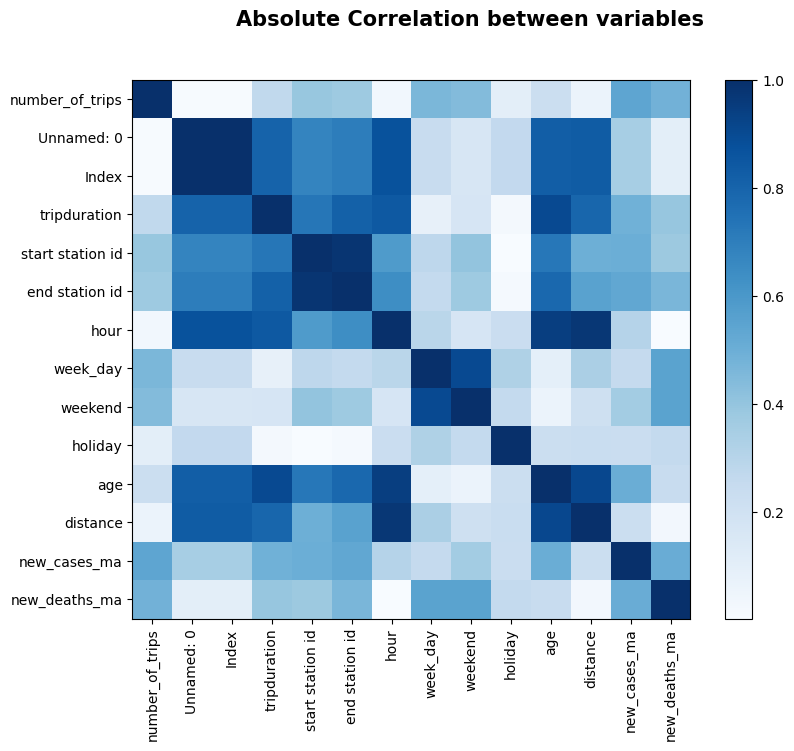

In [17]:
correlation_matrix = plot_all_correlations(trips_and_covid)

## COVID-19 cases

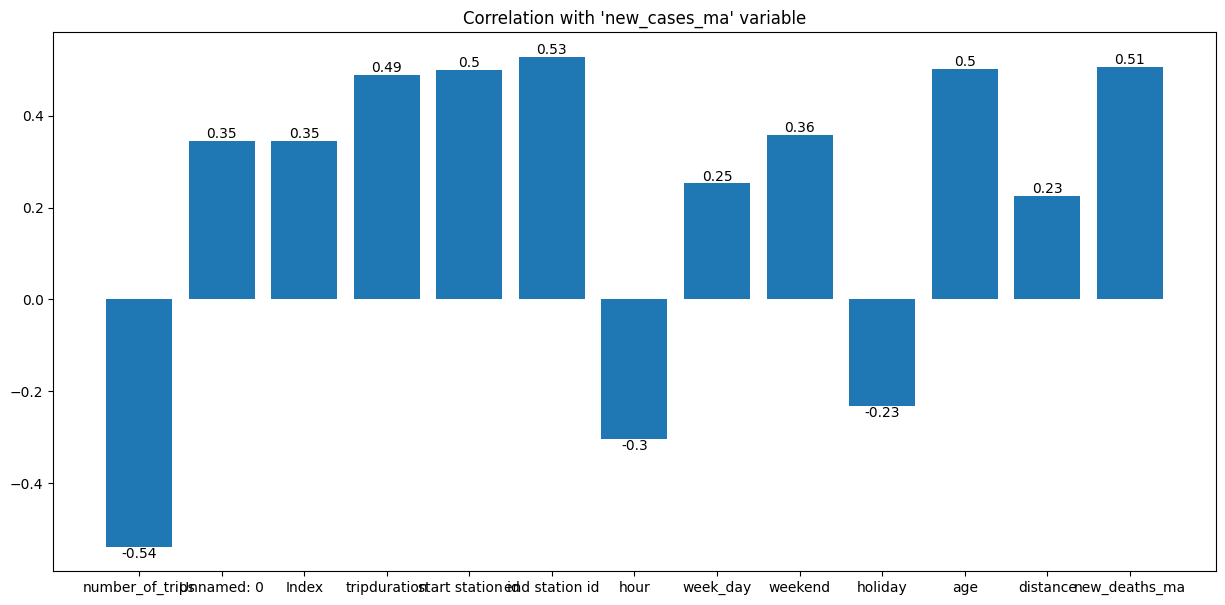

In [18]:
correlation_with_variable = plot_target_variable_correlation(trips_and_covid, correlation_matrix,
                                                            'new_cases_ma',
                                                             without_outliers = without_outliers)

## COVID-19 deaths

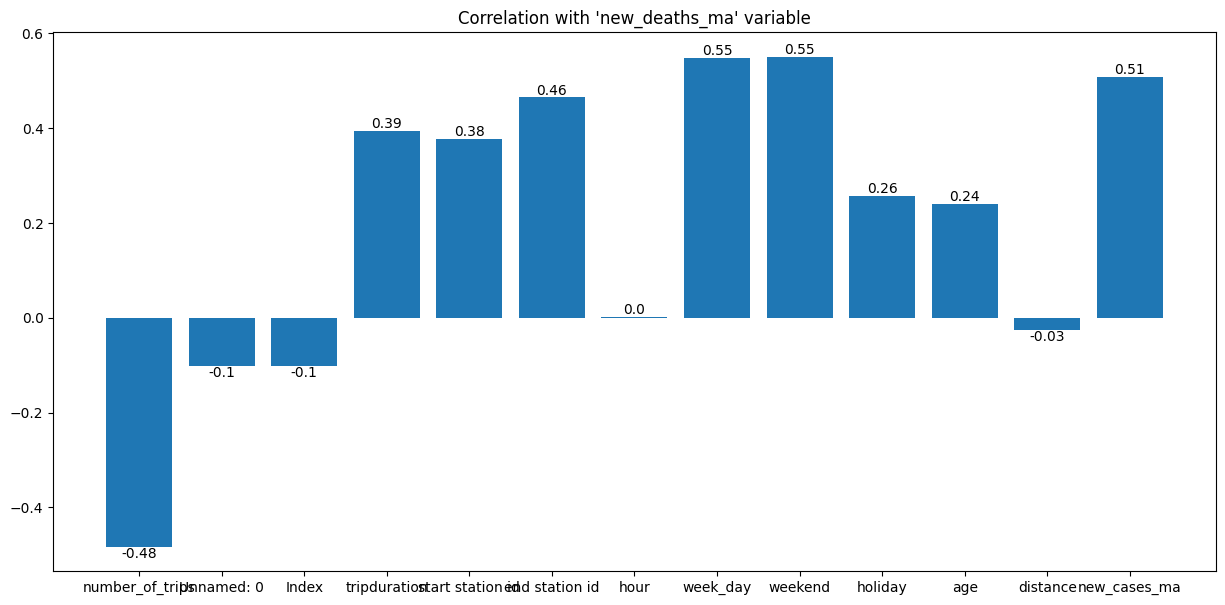

In [19]:
correlation_with_variable = plot_target_variable_correlation(trips_and_covid, correlation_matrix,
                                                            'new_deaths_ma',
                                                             without_outliers = without_outliers)

### Plot together

In [20]:
trips_and_covid

,number_of_trips,Unnamed: 0,Index,tripduration,start station id,end station id,hour,week_day,weekend,holiday,age,distance,new_cases_ma,new_deaths_ma
date,,,,,,,,,,,,,,
2020-03-01,254555,4571251.0,4571251.0,1598.689380,122.362975,124.475561,14.308589,2.714136,0.205798,0.000000,29.489589,2066.767922,150.576923,12.333333
2020-04-01,171013,4784035.0,4784035.0,1864.477385,134.627145,135.159644,15.060416,3.128277,0.291411,0.097677,28.081663,1500.378802,2174.333333,154.366667
2020-05-01,165918,4952500.5,4952500.5,1830.197519,137.094752,137.387558,15.022198,3.429128,0.363420,0.039146,28.588174,1582.606811,12159.870968,709.129032
2020-06-01,149364,5110141.5,5110141.5,1853.604409,135.094294,135.520547,15.012265,3.038322,0.287137,0.038229,28.856015,1598.006229,27629.260870,1006.033333
2020-07-01,172190,5270918.5,5270918.5,1816.509733,137.935571,138.383704,14.859899,3.177304,0.286515,0.031006,29.372170,1768.756514,38946.774194,1044.064516
2020-08-01,185598,5449812.5,5449812.5,1842.360047,136.988739,137.339907,14.784766,3.208461,0.338700,0.000000,29.462347,1764.155736,41451.129032,973.645161
2020-09-01,211317,5648270.0,5648270.0,1887.476119,141.006308,140.549930,14.619415,3.014093,0.289451,0.040224,29.349539,1743.258083,31207.833333,748.766667
2020-10-01,207622,5857739.5,5857739.5,2006.921164,138.524512,137.901674,14.660344,3.078407,0.284931,0.041123,29.283949,1766.925183,23612.064516,537.258065
2020-11-01,160526,6041813.5,6041813.5,2363.787038,140.336496,139.276399,14.355419,3.150898,0.329218,0.078467,30.216679,2028.508597,25812.133333,445.700000


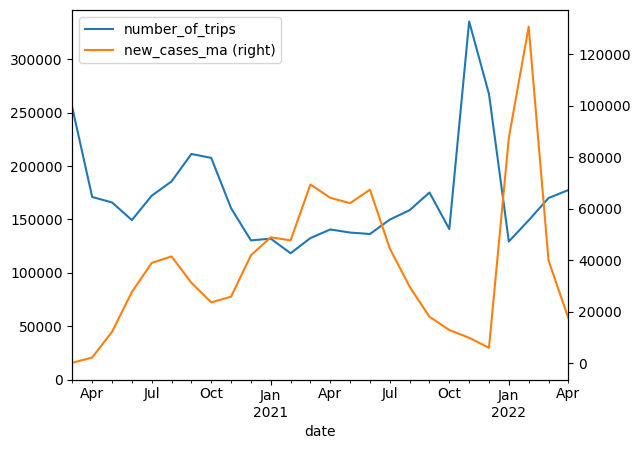

In [21]:
variable = 'number_of_trips'
covid_variable = 'new_cases_ma'
trips_and_covid_plot = trips_and_covid.filter([variable, covid_variable])
ax = trips_and_covid_plot.plot(secondary_y = covid_variable, ylim=(0,None))

In [22]:
def plot_variable_and_covid_together(variable, covid_variable):
    trips_and_covid_plot = trips_and_covid.filter([variable, covid_variable])
    ax = trips_and_covid_plot.plot(secondary_y = covid_variable, ylim=(0,None))
    plt.ylim(bottom=0)
    title = "'{variable}' vs '{covid_variable}'".format(variable = variable, covid_variable = covid_variable)
    plt.title(title)
    ax.axvline('2020-03-24', color="black", linestyle="--",  label='Início da quarentena')
    ax.axvline('2020-05-27', color="purple", linestyle="--",  label='Plano SP de retomada consciente')
    ax.axvline('2020-10-06', color="green", linestyle="--",  label='Fase Verde')
    ax.axvline('2020-11-30', color="yellow", linestyle="--",  label='Fase Amarela')
    ax.axvline('2021-03-15', color="red", linestyle="--",  label='Fase Emergencial')
    ax.axvline('2021-08-17', color="green", linestyle="--",  label='Fase Verde')
    ax.axvline('2021-11-01', color="m", linestyle="--",  label='Fim das restrições')
    plt.ylim(bottom=0)
    plt.axis([None, None, 0, None])
    ax.legend(bbox_to_anchor=(1.15, 1), loc='upper left')
    if without_outliers:
        filename = variable + '_vs_'+ covid_variable+'_without_ouliers.png'
    else:
        filename = variable + '_vs_'+ covid_variable+'.png'
    plt.savefig(destination_folder_path + 'versus_covid/'+filename)

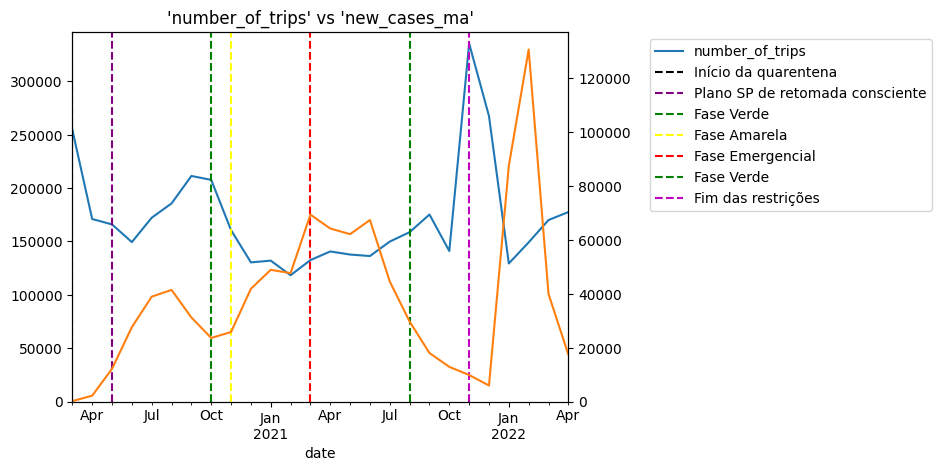

In [23]:
variable = 'number_of_trips'
covid_variable = 'new_cases_ma'
plot_variable_and_covid_together(variable, covid_variable)

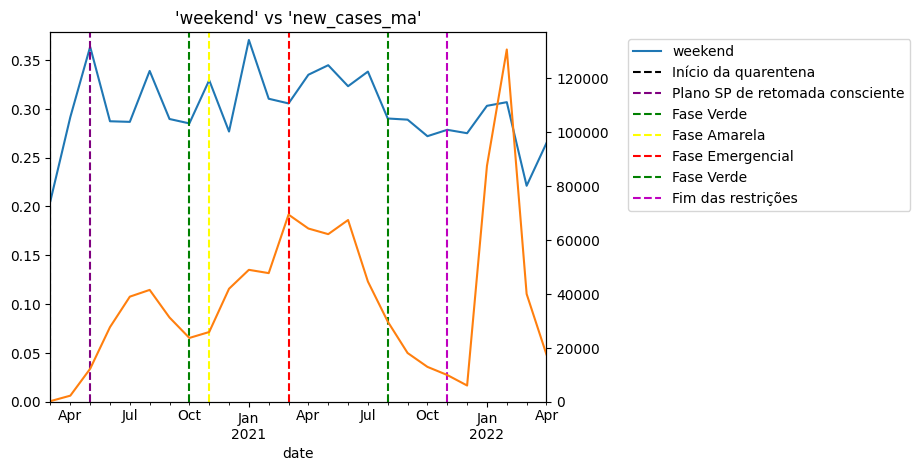

In [26]:
variable = 'weekend'
covid_variable = 'new_cases_ma'
plot_variable_and_covid_together(variable, covid_variable)

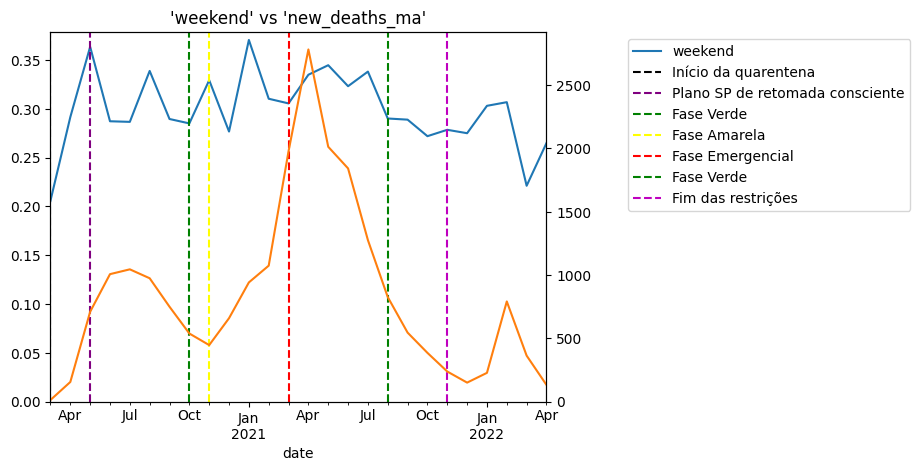

In [28]:
variable = 'weekend'
covid_variable = 'new_deaths_ma'
plot_variable_and_covid_together(variable, covid_variable)

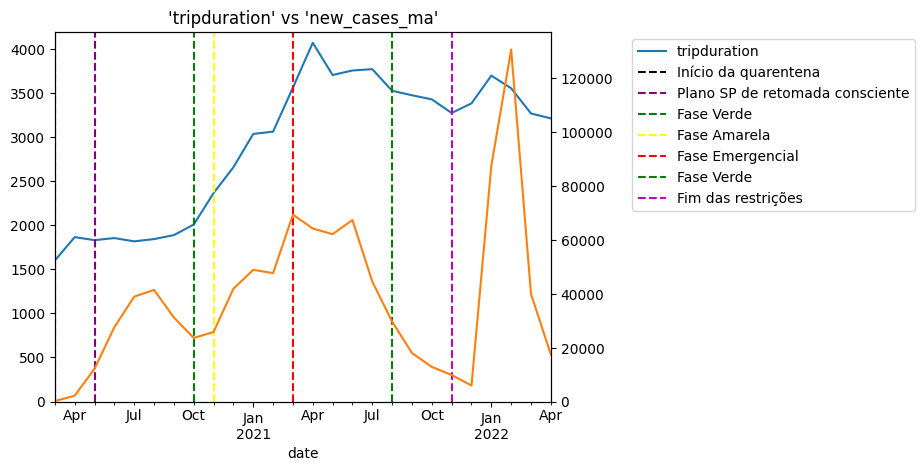

In [24]:
variable = 'tripduration'
covid_variable = 'new_cases_ma'
plot_variable_and_covid_together(variable, covid_variable)

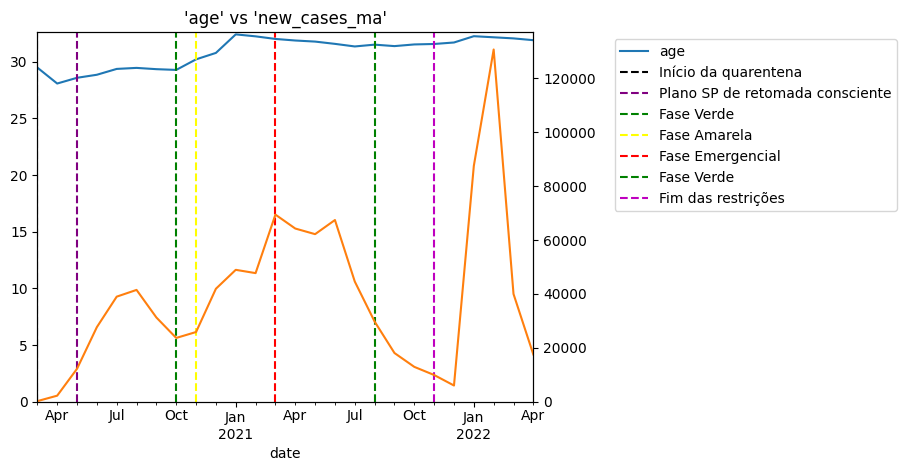

In [25]:
variable = 'age'
covid_variable = 'new_cases_ma'
plot_variable_and_covid_together(variable, covid_variable)

<AxesSubplot:xlabel='date'>

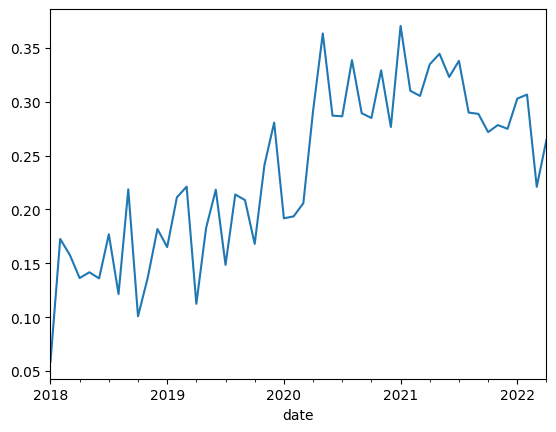

In [27]:
trips['weekend'].plot()